# 回帰まとめ
- 単回帰・重回帰
- Ridge/ Lasso
- LightGBM

## 回帰とは
- 目的変数が連続値の時にデータに Y = f(X) というモデルを当てはめる事。
- この時Xを説明変数とよぶ, Yを目的変数と呼ぶ。

In [4]:
# 単一の特徴量のみでの予測をする
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
import pandas as pd

import matplotlib.pyplot as plt

In [5]:
# 評価用の関数
import numpy as np
# yyplot入れる
def eval(true_, predict_):
    """
    評価用の関数
    """
    print("決定係数", r2_score(true_, predict_))
    yvalues = np.concatenate([true_, predict_])
    
    ymin, ymax, yrange = np.amin(yvalues), np.amax(yvalues), np.ptp(yvalues)
    fig = plt.figure(figsize=(8, 8))
    plt.scatter(true_, predict_)
    plt.plot([ymin - yrange * 0.01, ymax + yrange * 0.01], [ymin - yrange * 0.01, ymax + yrange * 0.01])
    plt.xlim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.ylim(ymin - yrange * 0.01, ymax + yrange * 0.01)
    plt.xlabel('y_observed', fontsize=24)
    plt.ylabel('y_predicted', fontsize=24)
    plt.title('Observed-Predicted Plot', fontsize=24)
    plt.tick_params(labelsize=16)
    plt.show()

In [6]:
# bostonのデータセットを使用する
# 説明変数 13カラム
# 目的変数 単位は、1,000(USD) ボストンの住宅価格
boston = load_boston()

# 説明変数取得
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数付与
df["y"] = boston.target

# 相関関係

In [7]:
import scipy.stats as sts

corr_mat = np.zeros((df.shape[1], df.shape[1]))

for i in range(df.shape[1]):    
    for j in range(df.shape[1]):        
        corrtest = sts.pearsonr(df[df.columns[i]], df[df.columns[j]])
        # stats配下にspearmanrやkendalltauも存在
        corr_mat[i,j] = corrtest[0]

df_corr = pd.DataFrame(corr_mat, columns=df.columns, index=df.columns)

In [15]:
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 特徴量の分布をみる

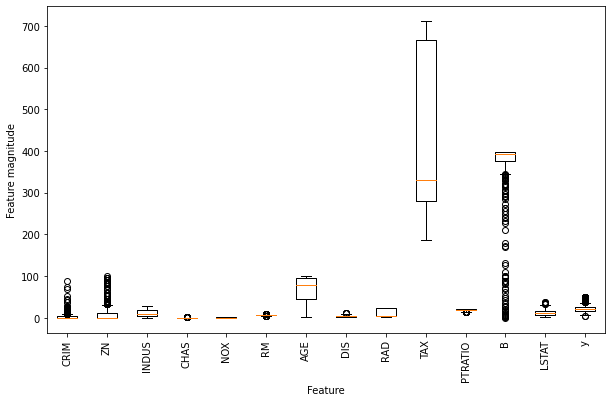

In [37]:
# 箱ひげ図
plt.figure(figsize=(10,6))
plt.xlabel('Feature')
plt.ylabel('Feature magnitude')
#plt.yscale('log')
plt.boxplot(df.to_numpy())
plt.xticks(range(1,df.shape[1]+1), df.columns, rotation=90)
plt.show()

# 特徴量エンジニアリング

In [42]:
# 標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_std = sc.fit_transform(df)

In [46]:
df_std = pd.DataFrame(df_std, columns=df.columns)

## 単回帰
- 下記の式の用に目的変数$y$と説明変数$x$の二変量の関係性を、一次方程式で示す
- $  y = ax + b $  


$y$:目的変数,  
$x$:説明変数,  
$a$:傾き,  
$b$:y切片

- ※決定係数の説明については評価指標用のノートブックに改めてまとめ直したい  
1に近い程モデルの当てはまりが良い

In [48]:
# 訓練用データと評価用データに分割する
train_df, test_df = train_test_split(df)

CRIM_決定係数: 0.07896570205710918
決定係数 0.07896570205710918


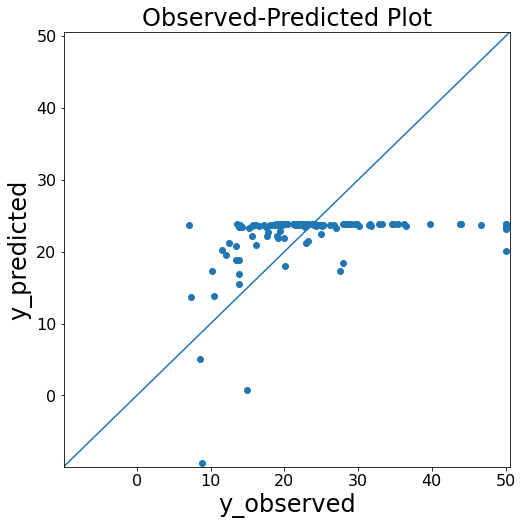

ZN_決定係数: 0.13021465423979084
決定係数 0.13021465423979084


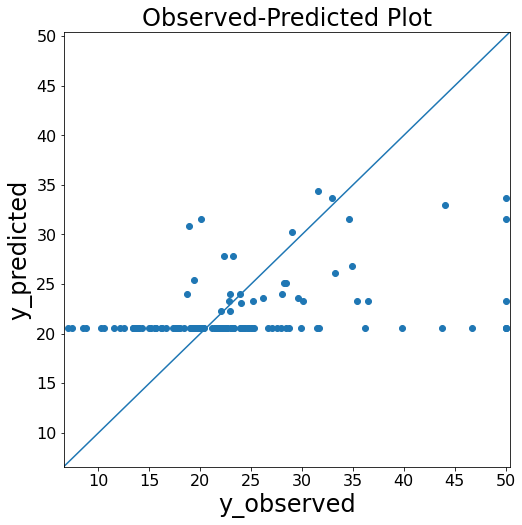

INDUS_決定係数: 0.23741280323075264
決定係数 0.23741280323075264


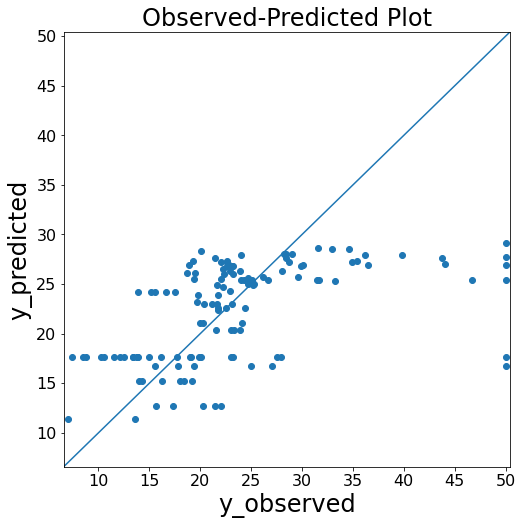

CHAS_決定係数: 0.01130694075190175
決定係数 0.01130694075190175


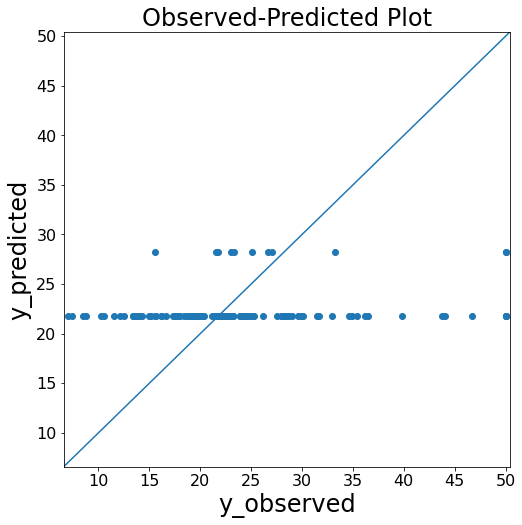

NOX_決定係数: 0.1578297837885907
決定係数 0.1578297837885907


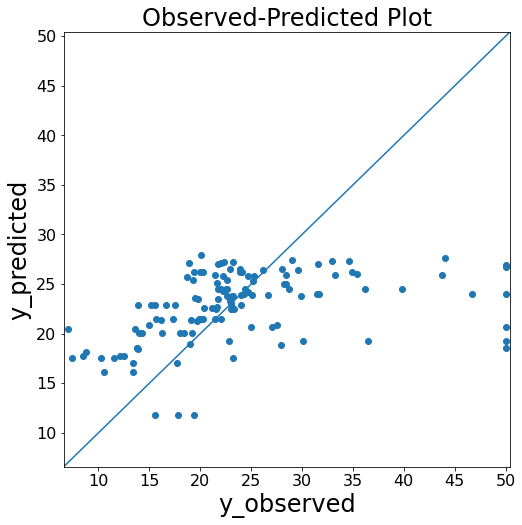

RM_決定係数: 0.5905496184834252
決定係数 0.5905496184834252


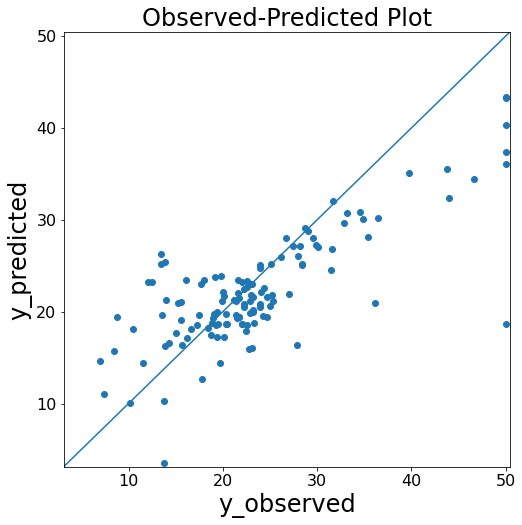

AGE_決定係数: 0.12515194110966366
決定係数 0.12515194110966366


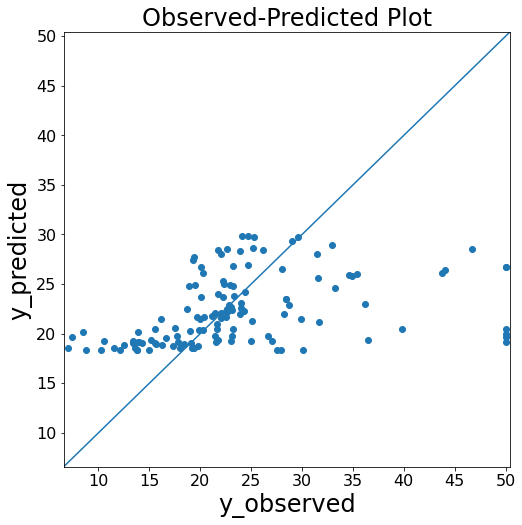

DIS_決定係数: 0.027021973918542108
決定係数 0.027021973918542108


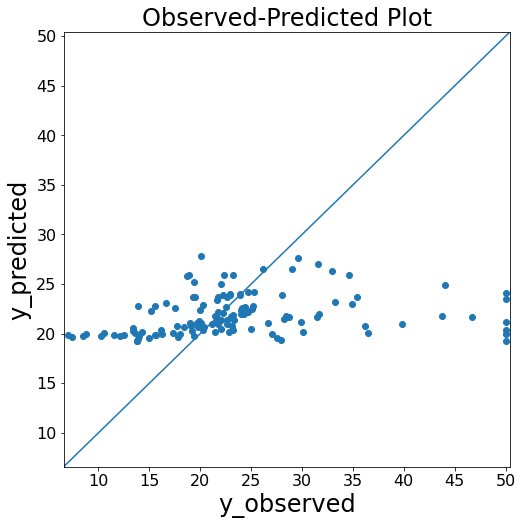

RAD_決定係数: 0.09022575352690965
決定係数 0.09022575352690965


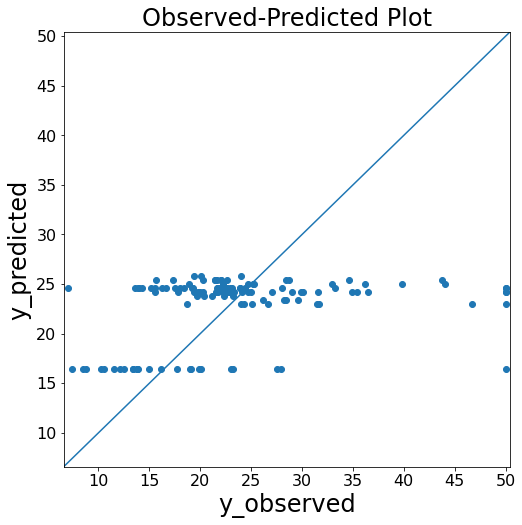

TAX_決定係数: 0.19414773793071594
決定係数 0.19414773793071594


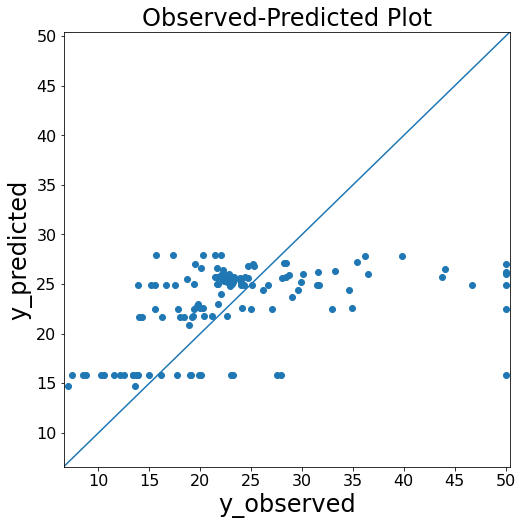

PTRATIO_決定係数: 0.30754814100950967
決定係数 0.30754814100950967


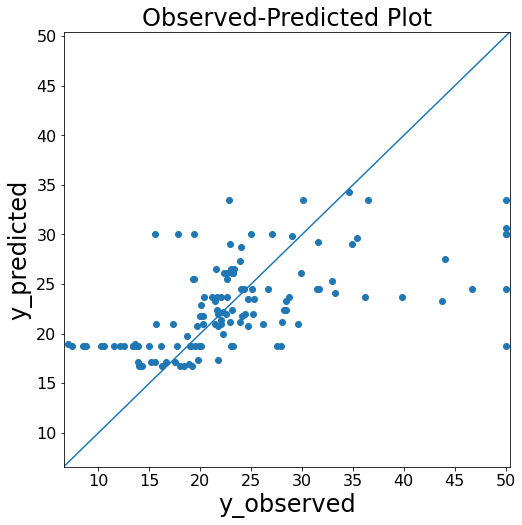

B_決定係数: 0.037531757702864876
決定係数 0.037531757702864876


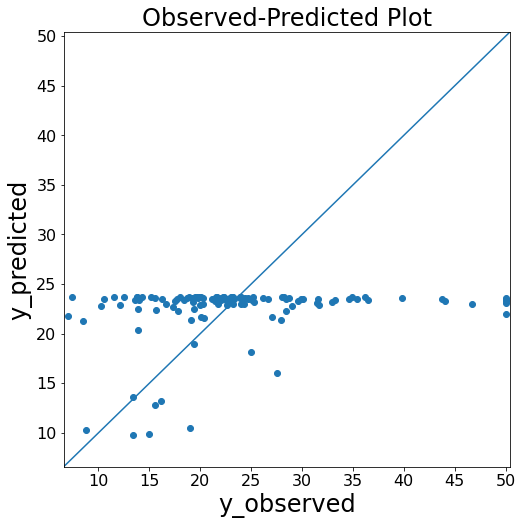

LSTAT_決定係数: 0.4957080054502151
決定係数 0.4957080054502151


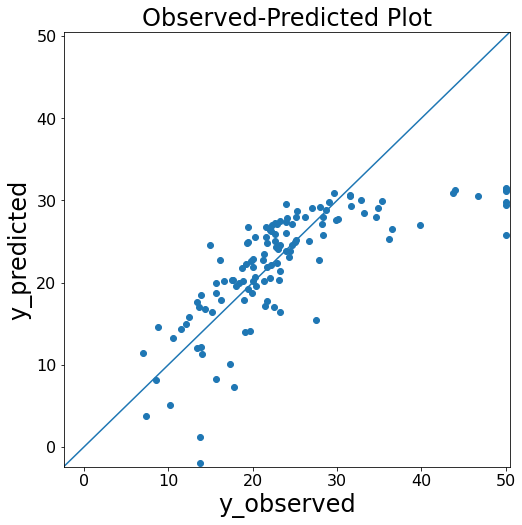

In [49]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
for target in target_col:
    X_train = train_df.loc[:, [target]]
    Y_train = train_df.loc[:, ["y"]]

    X_test = test_df.loc[:, [target]]
    Y_test = test_df.loc[:, ["y"]]
    
    model = linear_model.LinearRegression()
    model.fit(X_train,Y_train)
    
    pred_y = model.predict(X_test)
    
    print("{}_決定係数:".format(target),r2_score(Y_test, pred_y))
    
    eval(Y_test, pred_y)

# 重回帰分析
- 多変量解析の一つ
- 説明変数が複数

- 単回帰
- $  y = ax + b $ 

- 重回帰分析
-  $  y = b1x1 + b2x2 + b3x3 ・・・b0 $ 
- b1,b2,b3... : 偏回帰係数

重回帰分析_決定係数: 0.7325456695055443
決定係数 0.7325456695055443


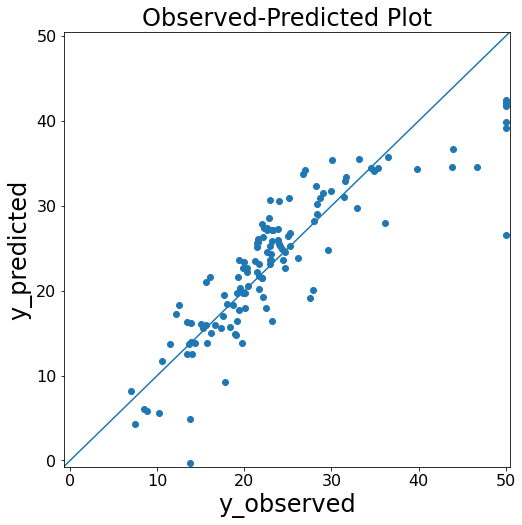

In [50]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X_train = train_df.loc[:, target_col]
Y_train = train_df.loc[:, ["y"]]

X_test = test_df.loc[:, target_col]
Y_test = test_df.loc[:, ["y"]]
    
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
    
pred_y = model.predict(X_test)
    
print("重回帰分析_決定係数:".format(target),r2_score(Y_test, pred_y))

eval(Y_test, pred_y)

In [52]:
# 標準化後のstd_df
# 訓練用データと評価用データに分割する
train_df, test_df = train_test_split(df_std)

重回帰分析_決定係数: 0.751002798357957
決定係数 0.751002798357957


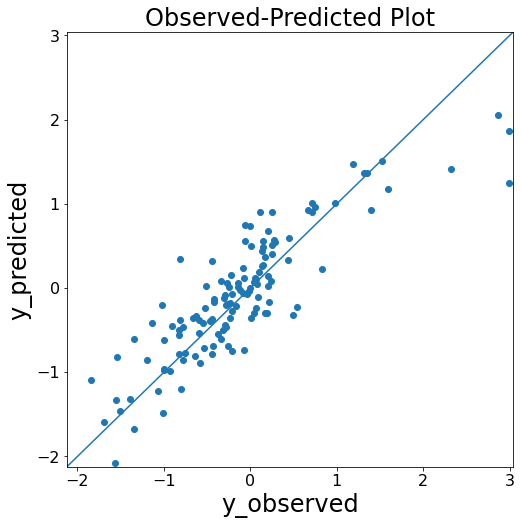

In [53]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
X_train = train_df.loc[:, target_col]
Y_train = train_df.loc[:, ["y"]]

X_test = test_df.loc[:, target_col]
Y_test = test_df.loc[:, ["y"]]
    
model = linear_model.LinearRegression()
model.fit(X_train,Y_train)
    
pred_y = model.predict(X_test)
    
print("重回帰分析_決定係数:".format(target),r2_score(Y_test, pred_y))

eval(Y_test, pred_y)

## Ridge回帰とは?
- 過学習を防ぐため線形回帰に正則化項(ペナルティ項)としてL2ノルムを導入したモデル
- 最小二乗法の式に正則化項を加え、その最小を求めることでモデル関数を発見する
- L2ノルム : ユークリッド距離と呼ばれるもので、ベクトル成分同士の差の二乗和の平方根

- 0に収束することが出来ないことに留意
- 係数の絶対値の大きさを可能な限り小さくする

## Lasso回帰とは


In [59]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [60]:
target_col = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]

決定係数 0.6554460628881653


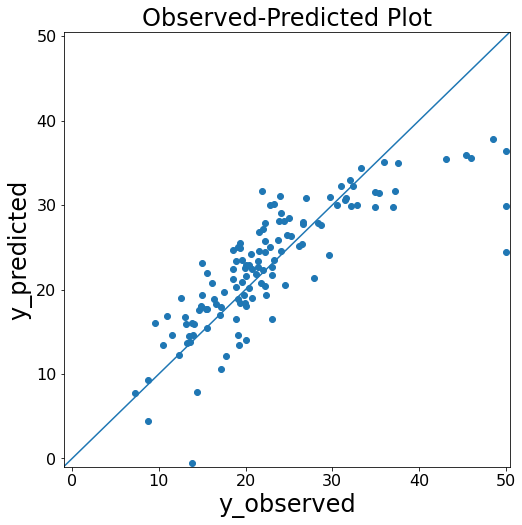

In [61]:
# Lasso回帰
# 訓練用データと、評価用データに分割する
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)

# モデルの作成
model = Lasso()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

決定係数 -0.001313716701186074


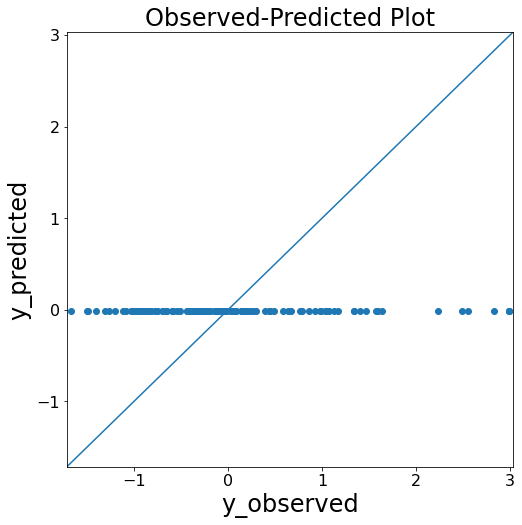

In [67]:
# 標準化 後
# Lasso回帰
# Lasso回帰は標準化するとこんな感じになっちゃう
# 訓練用データと、評価用データに分割する
x_train, x_test, y_train, y_test = train_test_split(df_std.loc[:,target_col],df_std["y"],random_state=123)

# モデルの作成
model = Lasso()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

決定係数 0.6775930475897151


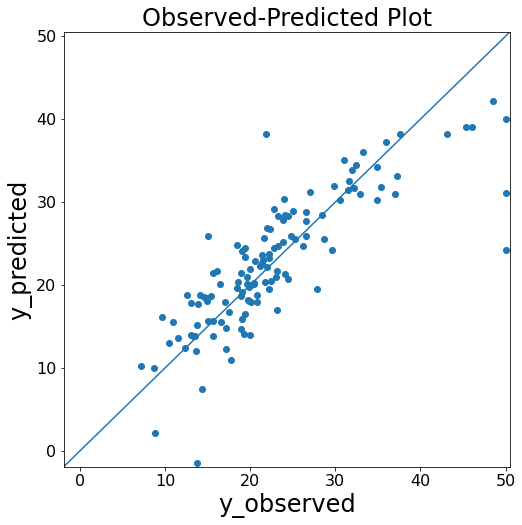

In [69]:
# Ridge回帰

x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)
# モデルの作成
model = Ridge()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

決定係数 0.6861818482801341


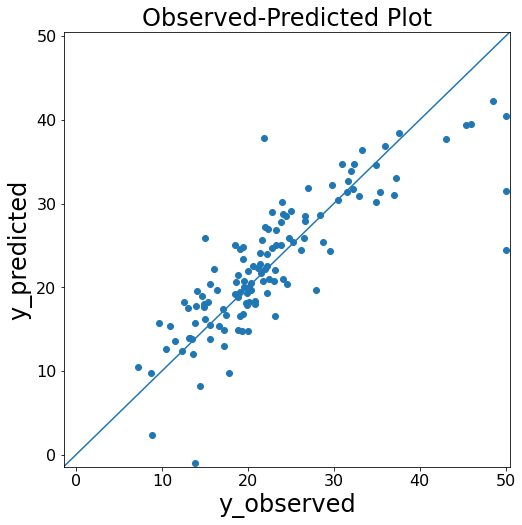

In [70]:
# Ridge回帰

x_train, x_test, y_train, y_test = train_test_split(df_std.loc[:,target_col],df["y"],random_state=123)
# モデルの作成
model = Ridge()
model.fit(x_train, y_train)

pred = model.predict(x_test)
r2_score(y_test, pred)
eval(y_test, pred)

# LightGBMで線形回帰

In [71]:
import lightgbm as lgb
from sklearn.model_selection import *

In [86]:
# モデルの学習
x_train, x_test, y_train, y_test = train_test_split(df.loc[:,target_col],df["y"],random_state=123)

model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(x_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.7967218949163066

決定係数 0.7967218949163066


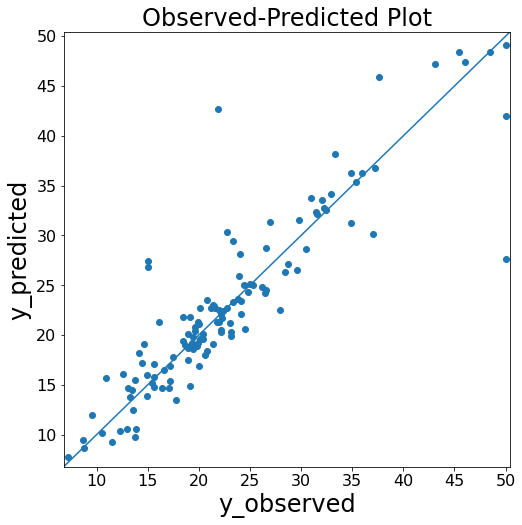

In [87]:
eval(y_test, y_pred)

In [92]:
# モデルの学習
# 標準化後
x_train, x_test, y_train, y_test = train_test_split(df_std.loc[:,target_col],df_std["y"],random_state=123)

model = lgb.LGBMRegressor() # モデルのインスタンスの作成
model.fit(x_train, y_train) # モデルの学習

# テストデータの予測
y_pred = model.predict(x_test)
r2_score(y_test,y_pred)

0.792835049640708

# ニューラルネットワーク

In [88]:
# モジュール import
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.15.0


In [89]:
# モデルの構築
# 2つの隠れ層 / 1つの出力層のシーケンシャルモデル
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(x_train.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [90]:
# 標準化
from sklearn import preprocessing
ss = preprocessing.StandardScaler()


l_2d_standardization = ss.fit_transform(df)

print(l_2d_standardization)

print(type(l_2d_standardization))

df_ = pd.DataFrame(columns=df.columns, data=l_2d_standardization)

[[-0.41978194  0.28482986 -1.2879095  ...  0.44105193 -1.0755623
   0.15968566]
 [-0.41733926 -0.48772236 -0.59338101 ...  0.44105193 -0.49243937
  -0.10152429]
 [-0.41734159 -0.48772236 -0.59338101 ...  0.39642699 -1.2087274
   1.32424667]
 ...
 [-0.41344658 -0.48772236  0.11573841 ...  0.44105193 -0.98304761
   0.14880191]
 [-0.40776407 -0.48772236  0.11573841 ...  0.4032249  -0.86530163
  -0.0579893 ]
 [-0.41500016 -0.48772236  0.11573841 ...  0.44105193 -0.66905833
  -1.15724782]]
<class 'numpy.ndarray'>


In [91]:
# 正則化を入れる
# 
x_train, x_test, y_train, y_test = train_test_split(df_.loc[:,target_col],df_["y"],random_state=123)

In [92]:
model = build_model()

In [93]:
# モデルの検証
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [94]:
# 訓練データから10個のバッチを取得してモデルを試してみる
example_batch = x_train[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.06314551],
       [ 0.2893812 ],
       [ 0.5705416 ],
       [-0.00960552],
       [ 0.45413128],
       [ 0.6528212 ],
       [ 0.46166152],
       [ 0.8506205 ],
       [ 0.15017433],
       [ 0.11684871]], dtype=float32)

In [95]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: 
            print('')
            print('.', end='')

EPOCHS = 1000

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS, validation_split = 0.2, verbose=0,
    callbacks=[PrintDot()])


.
.
.
.
.
.
.
.
.
.

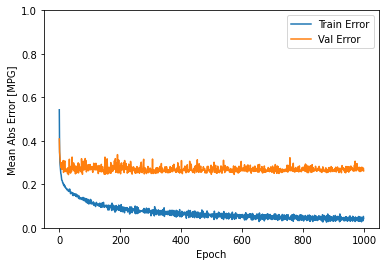

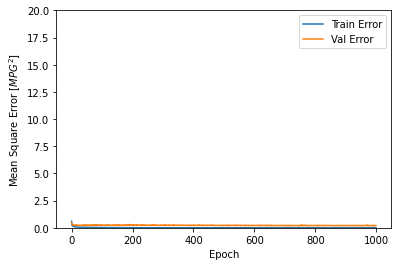

In [96]:
# モデルの学習の様子を可視化する
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
             label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
             label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


.

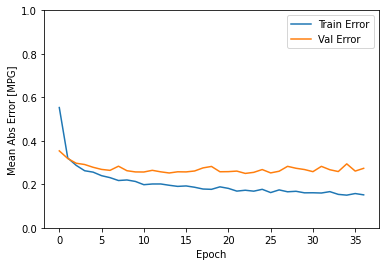

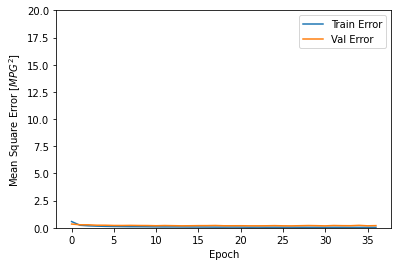

In [97]:
# early_stopを導入する
model = build_model()

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(x_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [98]:
# 訓練に使用していないテスト用のデータを使用して、みてみる
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

127/127 - 0s - loss: 0.1847 - mean_absolute_error: 0.2604 - mean_squared_error: 0.1847
Testing set Mean Abs Error:  0.26 MPG


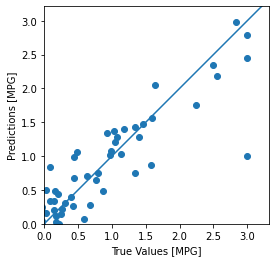

In [99]:
# モデルを使った予測
test_predictions = model.predict(x_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [100]:
r2_score(y_test, test_predictions)

0.8024978024047534